In [2]:
import pandas as pd
import numpy as np
import os

os.chdir('../..')
pd.options.display.max_columns = 9999
pd.options.display.max_rows = 9999

In [29]:
import seaborn as sns

%matplotlib inline

In [55]:
test_tracking = pd.read_csv('data/raw/test_tracking.csv.gz', compression='gzip')

In [88]:
test_tracking.shape

(908233, 31)

In [3]:
train_session = pd.read_csv('data/raw/train_session.csv.gz', compression='gzip') 

In [89]:
train_session.shape

(133123, 2)

In [90]:
train_tracking.shape

(1355095, 31)

In [91]:
product.shape

(10635919, 4)

In [4]:
train_session.head()

,sid,target
0,U6clt0UYaQB7vJQFmSWYymsAfwmT9SMhrm2oXQ8TC5M8mf...,False
1,0qRbLkxeOjeEo6CtxtB6VI8FNPt4Vl8niySzZLqSWiQOka...,False
2,cnCRGomfPqEWuhMZkA0RQfvTQiwVoyHXUqvqnPCutVouFO...,False
3,zBwrofN0r2ps9u/UCUS134SiZIqB+UgIEr0MZGHzksqR4f...,False
4,Kbr60r9eaX/ENOJ81R1YBxfwrEohoxyQI9Ma0fODsS+/XN...,False


In [58]:
train_session.target.value_counts()

False    120643
True      12480
Name: target, dtype: int64

In [100]:
test_tracking.sku.unique()

<bound method Series.unique of 0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
9                                                  NaN
10                                                 NaN
11                            gJ8Rak2NMJuaoq24c8K0cw==
12                                                 NaN
13                                                 NaN
14                            GRfy8g1sEXU81w/1DWypMg==
15                                                 NaN
16                                                 NaN
17                            yqJ4

In [5]:
train_tracking = pd.read_csv('data/raw/train_tracking.csv.gz', compression='gzip')

In [6]:
train_tracking.head()

,sid,type,query,nb_query_terms,rcount,pn,facets,products,dproducts,rh,rw,device,idcar,carproducts,sku,offerid,quantity,stype,sname,ff,oidcar,ocarproducts,oquery,orcount,ofacets,opn,odproducts,oproducts,siteid,duration,type_simplified
0,xvmQh3WmJGKaplwGgHf4o1MNKg2/6IpkbKNh4nnwZibi3f...,CAROUSEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094,1920,9DP4L/tKWLkYUystNndR3g==,IIWYMIbWc/3MM8J2jDfSJw==,[{'sku': 'JHRfp5ydSvpIOBk7rqeHaep6NPTGBfCKCRdX...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cF8tnO1rK7fIBxVIs+AW4w==,0 days 00:00:00.000000000,CAROUSEL
1,xvmQh3WmJGKaplwGgHf4o1MNKg2/6IpkbKNh4nnwZibi3f...,CAROUSEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094,1920,9DP4L/tKWLkYUystNndR3g==,IIWYMIbWc/3MM8J2jDfSJw==,[{'sku': 'V8buGT/FybKwREEFPwo8vup6NPTGBfCKCRdX...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cF8tnO1rK7fIBxVIs+AW4w==,0 days 00:00:11.179637600,CAROUSEL
2,xvmQh3WmJGKaplwGgHf4o1MNKg2/6IpkbKNh4nnwZibi3f...,CAROUSEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094,1920,9DP4L/tKWLkYUystNndR3g==,oJTJfSrMpHk5VzZyB9rtEw==,[{'sku': 'Acr3ieqo6rTn9cDfXO5/4up6NPTGBfCKCRdX...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cF8tnO1rK7fIBxVIs+AW4w==,0 days 00:00:13.132755800,CAROUSEL
3,xvmQh3WmJGKaplwGgHf4o1MNKg2/6IpkbKNh4nnwZibi3f...,CAROUSEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094,1920,9DP4L/tKWLkYUystNndR3g==,IIWYMIbWc/3MM8J2jDfSJw==,[{'sku': 'MlIOsc6DgaqG/BO9BBfEf+p6NPTGBfCKCRdX...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cF8tnO1rK7fIBxVIs+AW4w==,0 days 00:02:17.397333300,CAROUSEL
4,KeKjpi6re4QRYxl76E8sLPJHxRCeapb4sb69s5hmPCV+Jn...,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875,1266,9DP4L/tKWLkYUystNndR3g==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cF8tnO1rK7fIBxVIs+AW4w==,0 days 00:00:00.000000000,PA


In [77]:
train_tracking.type_simplified.unique()

array(['CAROUSEL', 'PA', 'SEARCH', 'ADD_TO_BASKET', 'PRODUCT', 'SHOW_CASE',
       'PURCHASE_PRODUCT', 'LIST_PRODUCT'], dtype=object)

In [79]:
train_tracking.type.unique()

array(['CAROUSEL', 'PA', 'SEARCH', 'ADD_TO_BASKET_LR', 'PRODUCT_LR',
       'SHOW_CASE', 'PURCHASE_PRODUCT_UNKNOW_ORIGIN',
       'PURCHASE_PRODUCT_LR', 'PRODUCT_PA', 'PRODUCT_CAROUSEL',
       'ADD_TO_BASKET_CAROUSEL', 'LIST_PRODUCT', 'PRODUCT_LP',
       'PRODUCT_SHOW_CASE', 'ADD_TO_BASKET_LP', 'ADD_TO_BASKET_PA',
       'ADD_TO_BASKET_SHOW_CASE', 'PURCHASE_PRODUCT_CAROUSEL',
       'PURCHASE_PRODUCT_PA', 'PURCHASE_PRODUCT_LP',
       'PURCHASE_PRODUCT_SHOW_CASE'], dtype=object)

In [67]:
product = pd.read_csv('data/raw/productid_category.csv.gz')

In [86]:
prod_type = train_tracking.groupby(['sku', 'type']).count()[['sid']].to_dict('index')
prod_sim_type = train_tracking.groupby(['sku', 'type_simplified']).count()[['sid']].to_dict('index')

In [93]:
from tqdm import tqdm

In [96]:
row

product_id                        OtpsXgEblcjumsDxtFGpRQ==
category_product_id_level1                              44
category_product_id_level2                             451
category_product_id_level3                            4742
PURCHASE_PRODUCT                                         0
PURCHASE_PRODUCT_CAROUSEL                                0
PURCHASE_PRODUCT_LP                                      0
PURCHASE_PRODUCT_LR                                      0
PURCHASE_PRODUCT_PA                                      0
PURCHASE_PRODUCT_SHOW_CASE                               0
PURCHASE_PRODUCT_UNKNOW_ORIGIN                           0
Name: 179, dtype: object

In [97]:
prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT')]['sid']

1

In [99]:
def add_purchase_count(col_prod='sku'):
    
    prod_type = train_tracking.groupby([col_prod, 'type']).count()[['sid']].to_dict('index')
    prod_sim_type = train_tracking.groupby([col_prod, 'type_simplified']).count()[['sid']].to_dict('index')
    
    product[f'PURCHASE_PRODUCT_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_CAROUSEL_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_LP_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_LR_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_PA_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_SHOW_CASE_{col_prod}'] = 0.0
    product[f'PURCHASE_PRODUCT_UNKNOW_ORIGIN_{col_prod}'] = 0.0

    for ix, row in tqdm(product.iterrows(), total=len(product)):
        if (row.product_id, 'PURCHASE_PRODUCT') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_CAROUSEL') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_CAROUSEL_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_CAROUSEL')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_LP') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_LP_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_LP')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_LR') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_LR_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_LR')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_PA') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_PA_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_PA')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_SHOW_CASE') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_SHOW_CASE_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_SHOW_CASE')]['sid']

        if (row.product_id, 'PURCHASE_PRODUCT_UNKNOW_ORIGIN') in prod_sim_type:
            product.at[ix, 'PURCHASE_PRODUCT_UNKNOW_ORIGIN_{col_prod}'] = prod_sim_type[(row.product_id, 'PURCHASE_PRODUCT_UNKNOW_ORIGIN')]['sid']

100%|██████████| 10635919/10635919 [16:57<00:00, 10450.79it/s]


In [104]:
product.shape

(10635919, 11)

In [103]:
product.loc[product['PURCHASE_PRODUCT'] != 0].shape

(4113, 11)

In [108]:
product.columns

Index(['product_id', 'category_product_id_level1',
       'category_product_id_level2', 'category_product_id_level3',
       'PURCHASE_PRODUCT', 'PURCHASE_PRODUCT_CAROUSEL', 'PURCHASE_PRODUCT_LP',
       'PURCHASE_PRODUCT_LR', 'PURCHASE_PRODUCT_PA',
       'PURCHASE_PRODUCT_SHOW_CASE', 'PURCHASE_PRODUCT_UNKNOW_ORIGIN'],
      dtype='object')

In [107]:
 4113 * 100/ 10635919

0.03867084734285772

In [ ]:
train_traking.head()

In [57]:
train_tracking.loc[train_tracking.type=='PURCHASE_PRODUCT_UNKNOWN_ORIGIN']

,sid,type,query,nb_query_terms,rcount,pn,facets,products,dproducts,rh,rw,device,idcar,carproducts,sku,offerid,quantity,stype,sname,ff,oidcar,ocarproducts,oquery,orcount,ofacets,opn,odproducts,oproducts,siteid,duration,type_simplified


In [65]:
train_tracking.isnull().sum()

sid                      0
type                     0
query               818913
nb_query_terms      818852
rcount              600222
pn                  600222
facets             1243599
products            763782
dproducts           893192
rh                       0
rw                       0
device                3528
idcar              1013152
carproducts        1013152
sku                1090542
offerid            1090542
quantity           1308564
stype              1090542
sname              1179143
ff                 1090542
oidcar             1297233
ocarproducts       1297233
oquery             1193550
orcount            1193550
ofacets            1335911
opn                1193550
odproducts         1193550
oproducts          1193555
siteid                   3
duration                 0
type_simplified          0
dtype: int64

In [23]:
train_tracking.groupby('sid').count().sort_values(by='type', descendent=False).head()

,type,query,nb_query_terms,rcount,pn,facets,products,dproducts,rh,rw,device,idcar,carproducts,sku,offerid,quantity,stype,sname,ff,oidcar,ocarproducts,oquery,orcount,ofacets,opn,odproducts,oproducts,siteid,duration,type_simplified
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fNdCFHZkd7JzogjnM0ylC1WVgRyFx9vFMGQIYkNCm9m4tvdgaTBmUsO2Lw16YsPj,3,0,0,0,0,0,0,0,3,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
JRNeM7bzHte4egKVAPNSgbbTUHprWV0sTgtCzCx3KiN3R6ih6D1EVtFeFDjZxqGO,3,3,3,3,3,0,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
JRNgRglS/ZYGZE1s41PBZ1AyPQYBmJmX5lRFVoPUMhzR7KEwGnl/OqZXDJw3aZtR,3,0,0,0,0,0,0,0,3,3,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
qTQkGw+u7IKtWnrI6b0U2pq/wP+ooNm6b7pmfJrpjJmgmV36206sXgCZ7H0dmxBV,3,0,0,0,0,0,0,0,3,3,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
WT7W04BvOA1pGIgrqYRD+WTZLOV6+0koZH2wprhCSrKxjXCKLoXLFdiGWeNjmHO/,3,0,0,0,0,0,0,0,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3


In [28]:
train_tracking.groupby('sid').count().sort_values(by='type', ascending=False).head()

,type,query,nb_query_terms,rcount,pn,facets,products,dproducts,rh,rw,device,idcar,carproducts,sku,offerid,quantity,stype,sname,ff,oidcar,ocarproducts,oquery,orcount,ofacets,opn,odproducts,oproducts,siteid,duration,type_simplified
sid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EVW1RWekMF31JKq4MiFSMHE6OxV7dtwW0vBMFJDhNt12pPtCpO5v5NW86b+8dN11,951,951,951,951,951,0,950,950,951,951,951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,951,951,951
zwcPZrwqKAmfOC4Ird4LR/mbX+BEaJqwZNC3DBJ0DSJZpMWjRP+3rEz1kj1susWz,578,0,0,577,577,0,516,0,578,578,578,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,578,578,578
bKS3XlUDDIm5Y/yKa7jK7IvEohCe0ldE3IVGDKZuQ8Zjh/Nntp+EzIeQlG658UQx,541,76,76,137,137,45,103,42,541,541,541,314,314,119,119,56,119,87,119,69,69,34,34,4,34,34,34,541,541,541
T7diZiLdFbUfiR8pqMrvrgsTlciib4kUpsrZBuigFcabGSWXrQuSZZMPN/mceAQq,536,372,372,476,476,74,372,372,536,536,536,50,50,107,107,22,107,72,107,3,3,104,104,31,104,104,104,536,536,536
LOPLJPfieLGwslLa5P4ucb76FmW4S1UJI1e0f3ODMs8bagAw+RyqLG4+6x0qFjB6,525,302,302,519,519,148,301,301,525,525,525,0,0,218,218,1,218,210,218,0,0,217,217,120,217,217,217,525,525,525


In [63]:
train_tracking.groupby('sid').count().sort_values(by='type', ascending=False).head()[['type']].to_dict('index')

{'EVW1RWekMF31JKq4MiFSMHE6OxV7dtwW0vBMFJDhNt12pPtCpO5v5NW86b+8dN11': {'type': 951},
 'LOPLJPfieLGwslLa5P4ucb76FmW4S1UJI1e0f3ODMs8bagAw+RyqLG4+6x0qFjB6': {'type': 525},
 'T7diZiLdFbUfiR8pqMrvrgsTlciib4kUpsrZBuigFcabGSWXrQuSZZMPN/mceAQq': {'type': 536},
 'bKS3XlUDDIm5Y/yKa7jK7IvEohCe0ldE3IVGDKZuQ8Zjh/Nntp+EzIeQlG658UQx': {'type': 541},
 'zwcPZrwqKAmfOC4Ird4LR/mbX+BEaJqwZNC3DBJ0DSJZpMWjRP+3rEz1kj1susWz': {'type': 578}}

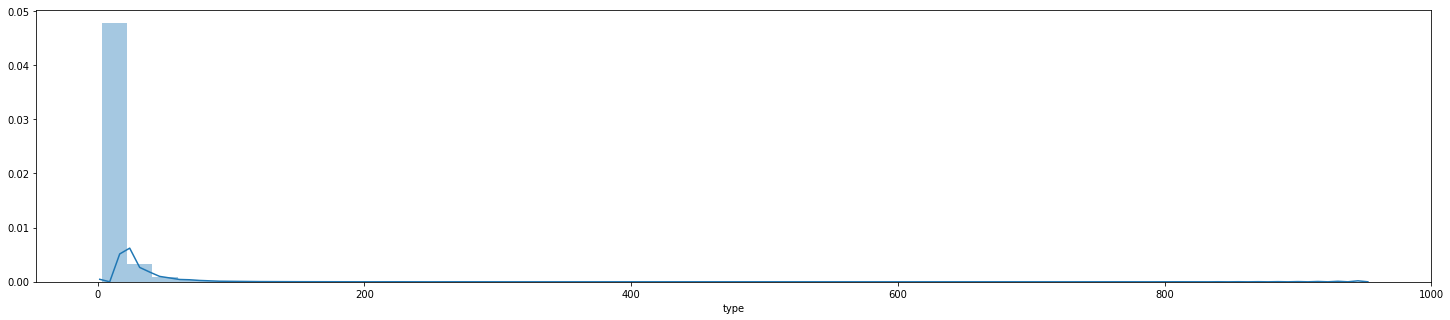

In [39]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (25, 5)
sns.distplot(train_tracking.groupby('sid').count().reset_index()['type'])

In [54]:
test_tracking.groupby('sid').count().sort_values(by='type', descendent=False).head()

NameError: name 'test_tracking' is not defined

In [45]:
ses_id = train_tracking.groupby('sid').count().reset_index()['type']

In [46]:
ses_id.shape

(133123,)

In [49]:
ses_id[ses_id > 20].shape

(13538,)

In [14]:
train_tracking.type.value_counts()

SEARCH                            463181
CAROUSEL                          341943
PRODUCT_LR                        128390
LIST_PRODUCT                      105838
PA                                103794
SHOW_CASE                          75786
PRODUCT_CAROUSEL                   51681
ADD_TO_BASKET_LR                   31368
PRODUCT_LP                         20807
PRODUCT_SHOW_CASE                   9800
PRODUCT_PA                          7344
ADD_TO_BASKET_CAROUSEL              5863
ADD_TO_BASKET_LP                    3341
PURCHASE_PRODUCT_UNKNOW_ORIGIN      2369
PURCHASE_PRODUCT_LR                 1790
ADD_TO_BASKET_SHOW_CASE              770
ADD_TO_BASKET_PA                     472
PURCHASE_PRODUCT_CAROUSEL            318
PURCHASE_PRODUCT_LP                  158
PURCHASE_PRODUCT_SHOW_CASE            46
PURCHASE_PRODUCT_PA                   36
Name: type, dtype: int64

In [12]:
train_tracking.loc[0].carproducts

"[{'sku': 'JHRfp5ydSvpIOBk7rqeHaep6NPTGBfCKCRdXNRSP70U=', 'offerid': 'I4uYESr7Y8pyx1kaWMwLfg==', 'sellerid': 'OIdZFf8YRuBT+Tp9H7QgjQ==', 'rate': 4.0, 'pos': 1, 'rvoter': 60.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'JGbY4Xi8tZMP0i9i8R0mZw==', 'offerid': 'YDUgvgVel/DU7BHegPACXQ==', 'sellerid': 'xYc0p0eqncEwfcO1gZGNlw==', 'rate': 4.0, 'pos': 2, 'rvoter': 66.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'ioItlz4fgWj7pNhj0tFe8Q==', 'offerid': 'GdcX88VjLl2fWZX6GNx3Eg==', 'sellerid': 'xYc0p0eqncEwfcO1gZGNlw==', 'rate': 4.0, 'pos': 3, 'rvoter': 40.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'z1NCgPK4X8X1Lf8+MGpQx+p6NPTGBfCKCRdXNRSP70U=', 'offerid': 'FPkAvVLaVbs9HMWl+WBqfA==', 'sellerid': 'JWuMj31B3tdqwkpcOUUhMA==', 'rate': 4.0, 'pos': 4, 'rvoter': 176.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'xx0DNiYR7Yl9fRdgoArbJA==', 'offerid': 'fR9k3om8z0ygjcOsMKwKqQ==', 'sellerid': '+LNOS/I4b2wdKewJPuTnVg==', 'rate': 3.0, 'pos': 5, 'rvoter': 3.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'WvVS

In [13]:
train_tracking.loc[1].carproducts

"[{'sku': 'V8buGT/FybKwREEFPwo8vup6NPTGBfCKCRdXNRSP70U=', 'offerid': '9rwA4sokB7gfhL+BBMiJyw==', 'sellerid': 'xYc0p0eqncEwfcO1gZGNlw==', 'rate': 5.0, 'pos': 1, 'rvoter': 1.0, 'prices': 100.0, 'isinstock': True}, {'sku': 'JHRfp5ydSvpIOBk7rqeHaep6NPTGBfCKCRdXNRSP70U=', 'offerid': 'I4uYESr7Y8pyx1kaWMwLfg==', 'sellerid': 'OIdZFf8YRuBT+Tp9H7QgjQ==', 'rate': 4.0, 'pos': 2, 'rvoter': 60.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'JGbY4Xi8tZMP0i9i8R0mZw==', 'offerid': 'YDUgvgVel/DU7BHegPACXQ==', 'sellerid': 'xYc0p0eqncEwfcO1gZGNlw==', 'rate': 4.0, 'pos': 3, 'rvoter': 66.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'ioItlz4fgWj7pNhj0tFe8Q==', 'offerid': 'GdcX88VjLl2fWZX6GNx3Eg==', 'sellerid': 'xYc0p0eqncEwfcO1gZGNlw==', 'rate': 4.0, 'pos': 4, 'rvoter': 40.0, 'prices': 0.0, 'isinstock': True}, {'sku': 'z1NCgPK4X8X1Lf8+MGpQx+p6NPTGBfCKCRdXNRSP70U=', 'offerid': 'FPkAvVLaVbs9HMWl+WBqfA==', 'sellerid': 'JWuMj31B3tdqwkpcOUUhMA==', 'rate': 4.0, 'pos': 5, 'rvoter': 176.0, 'prices': 0.0, 'isinstock'

In [10]:
product = pd.read_csv('data/raw/productid_category.csv.gz')

EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
product.head()